Iteration 0: gBest = [0.26872792 0.06705697], value = 1.998314
Iteration 10: gBest = [-0.02182781  0.00882569], value = 0.081294
Iteration 20: gBest = [ 0.00175306 -0.00150042], value = 0.006668
Iteration 30: gBest = [0.00148579 0.00068073], value = 0.004694
Iteration 40: gBest = [ 0.00126966 -0.00071842], value = 0.004183
Iteration 50: gBest = [-0.00013623  0.00016178], value = 0.000599
Iteration 60: gBest = [-2.16595461e-05 -1.81966374e-05], value = 0.000080
Iteration 70: gBest = [-7.22506719e-07  8.26664069e-06], value = 0.000023
Iteration 80: gBest = [ 2.41581727e-06 -7.56679650e-06], value = 0.000022
Iteration 90: gBest = [ 1.73574629e-06 -8.48478772e-07], value = 0.000005
Iteration 99: gBest = [3.78679975e-07 2.14698437e-07], value = 0.000001


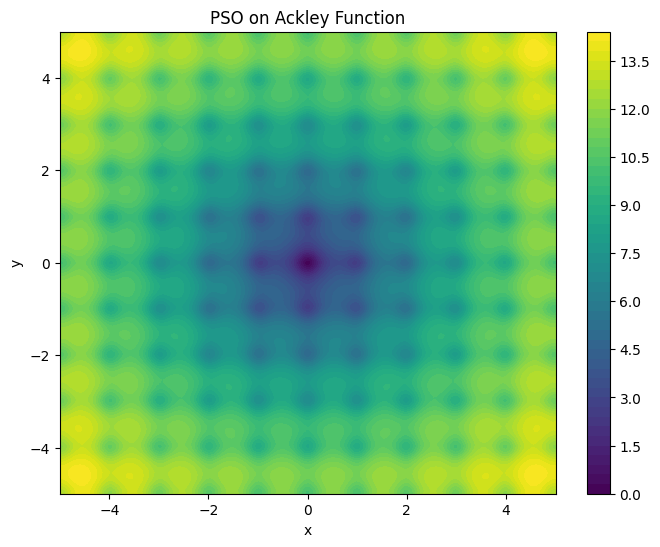

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Ackley Function (2D)
def ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    d = len(x)
    sum1 = np.sum(x**2)
    sum2 = np.sum(np.cos(c * x))
    term1 = -a * np.exp(-b * np.sqrt(sum1 / d))
    term2 = -np.exp(sum2 / d)
    return term1 + term2 + a + np.exp(1)

# PSO Parameters
num_particles = 30
dimensions = 2
iters = 100
bounds = (-5, 5)
w = 0.7
c1 = 1.5
c2 = 1.5

# Initialize Particles
position = np.random.uniform(bounds[0], bounds[1], (num_particles, dimensions))
velocity = np.zeros((num_particles, dimensions))
pbest = position.copy()
pbest_val = np.array([ackley(p) for p in pbest])
gbest = pbest[np.argmin(pbest_val)]
gbest_val = np.min(pbest_val)

# Store positions for animation
positions_over_time = []

# PSO Loop
for i in range(iters):
    r1 = np.random.rand(num_particles, dimensions)
    r2 = np.random.rand(num_particles, dimensions)
    velocity = w * velocity + c1 * r1 * (pbest - position) + c2 * r2 * (gbest - position)
    position += velocity
    position = np.clip(position, bounds[0], bounds[1])

    scores = np.array([ackley(p) for p in position])
    improved = scores < pbest_val
    pbest[improved] = position[improved]
    pbest_val[improved] = scores[improved]

    if np.min(pbest_val) < gbest_val:
        gbest_val = np.min(pbest_val)
        gbest = pbest[np.argmin(pbest_val)]

    positions_over_time.append(position.copy())

    if i % 10 == 0 or i == iters - 1:
        print(f"Iteration {i}: gBest = {gbest}, value = {gbest_val:.6f}")

# Create meshgrid for contour plot
x = np.linspace(bounds[0], bounds[1], 200)
y = np.linspace(bounds[0], bounds[1], 200)
X, Y = np.meshgrid(x, y)

# Evaluate Ackley function on the grid
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = ackley(np.array([X[i, j], Y[i, j]]))

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
particles, = ax.plot([], [], 'ro', markersize=4)

# Animation functions
def init():
    particles.set_data([], [])
    return particles,

def update(frame):
    pos = positions_over_time[frame]
    particles.set_data(pos[:, 0], pos[:, 1])
    ax.set_title(f"Iteration {frame}")
    return particles,

ani = animation.FuncAnimation(
    fig, update, frames=iters,
    init_func=init, blit=True, interval=100, repeat=False
)

plt.colorbar(contour)
plt.xlabel("x")
plt.ylabel("y")
plt.title("PSO on Ackley Function")
plt.show()


In [1]:
!pip install pillow



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from matplotlib.animation import PillowWriter

# Save animation as GIF
ani.save("pso_ackley.gif", writer=PillowWriter(fps=10))
print("GIF saved as pso_ackley.gif")


GIF saved as pso_ackley.gif


In [5]:
!ls

pso_ackley.gif	pso.ipynb
